In [1]:
import numpy as np
import sisl

Geometry{na: 3, no: 3,
 Atoms{species: 2,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 2,
  Atom{H, Z: 1, mass(au): 1.00794, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 1,
 },
 maxR: -1.00000,
 Lattice{nsc: [3 3 1],
  origin=[0.0000, 0.0000, 0.0000],
  A=[2.1300, 1.2298, 0.0000],
  B=[2.1300, -1.2298, 0.0000],
  C=[0.0000, 0.0000, 20.0000],
  bc=[Periodic,
      Periodic,
      Periodic]
 }
}


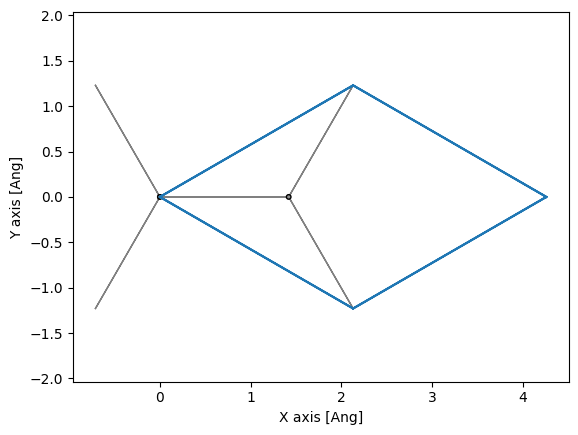

In [ ]:
# Carbon-carbon bond length in Angstrom
a_cc = 1.42

# Lattice vectors for a 2D graphene unit cell
a1 = [3 / 2 * a_cc, np.sqrt(3) / 2 * a_cc, 0.0]
a2 = [3 / 2 * a_cc, -np.sqrt(3) / 2 * a_cc, 0.0]
a3 = [0.0, 0.0, 20.0]  # vacuum in z

lattice = sisl.Lattice([a1, a2, a3], nsc=[3, 3, 1])

# Atomic positions
pos = [
    [0.0, 0.0, 0.0],
    [1.42, 0, 0.0],
    [0.0, 0.0, 0.0],
]

atoms = [
    sisl.Atom(6),  # Carbon
    sisl.Atom(6),  # Carbon
    sisl.Atom(1),
]

# Build geometry
geom = sisl.Geometry(pos, atoms, lattice=lattice)
geom.plot(axes="xy", backend="matplotlib")

In [ ]:
hamiltonian = sisl.Hamiltonian(geom)

t = 1.0
V = 2.0

for ia in geom:
    if ia != hamiltonian.no - 1:
        idx_a = hamiltonian.close(ia, R=[0.1, 1.44])
        hamiltonian[ia, idx_a[0]] = 0.0
        hamiltonian[ia, idx_a[1]] = t

hamiltonian.H[0, 2] = V
hamiltonian.H[2, 0] = V

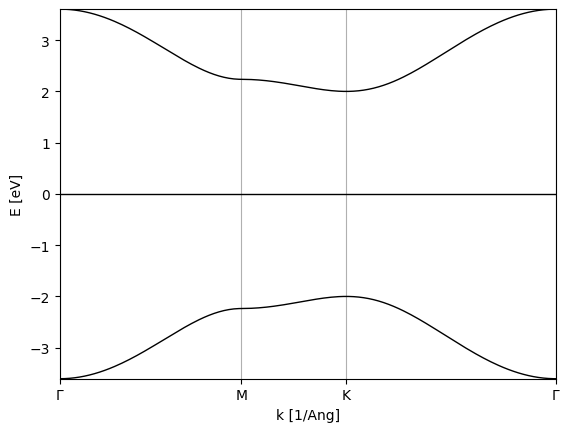

In [72]:
band = sisl.BandStructure(
    hamiltonian,
    [[0, 0, 0], [0, 0.5, 0], [1 / 3, 2 / 3, 0], [0, 0, 0]],
    200,
    [r"$\Gamma$", r"M", r"K", r"$\Gamma$"],
)
band.plot(backend="matplotlib")